### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### Loading Dataset

In [4]:
data=pd.read_csv("CAR_DETAILS_.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
5995,Mahindra XUV500 W10 2WD,2016,1250000,35000,Diesel,Individual,Manual,First Owner
5996,Maruti S-Cross Zeta DDiS 200 SH,2015,750000,45974,Diesel,Trustmark Dealer,Manual,First Owner
5997,Maruti Ertiga BSIV VXI AT,2017,800000,30600,Petrol,Individual,Automatic,First Owner
5998,Maruti Swift VDI Optional,2017,600000,60000,Diesel,Individual,Manual,Second Owner


### Data Preprcessing

In [6]:
data.shape

(6000, 8)

In [7]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [9]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()

In [10]:
data["name"]=le1.fit_transform(data["name"])
data["fuel"]=le2.fit_transform(data["fuel"])
data["seller_type"]=le3.fit_transform(data["seller_type"])
data["transmission"]=le4.fit_transform(data["transmission"])
data["owner"]=le5.fit_transform(data["owner"])

In [11]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
5995,744,2016,1250000,35000,1,1,1,0
5996,935,2015,750000,45974,1,2,1,0
5997,876,2017,800000,30600,4,1,0,0
5998,994,2017,600000,60000,1,1,1,2


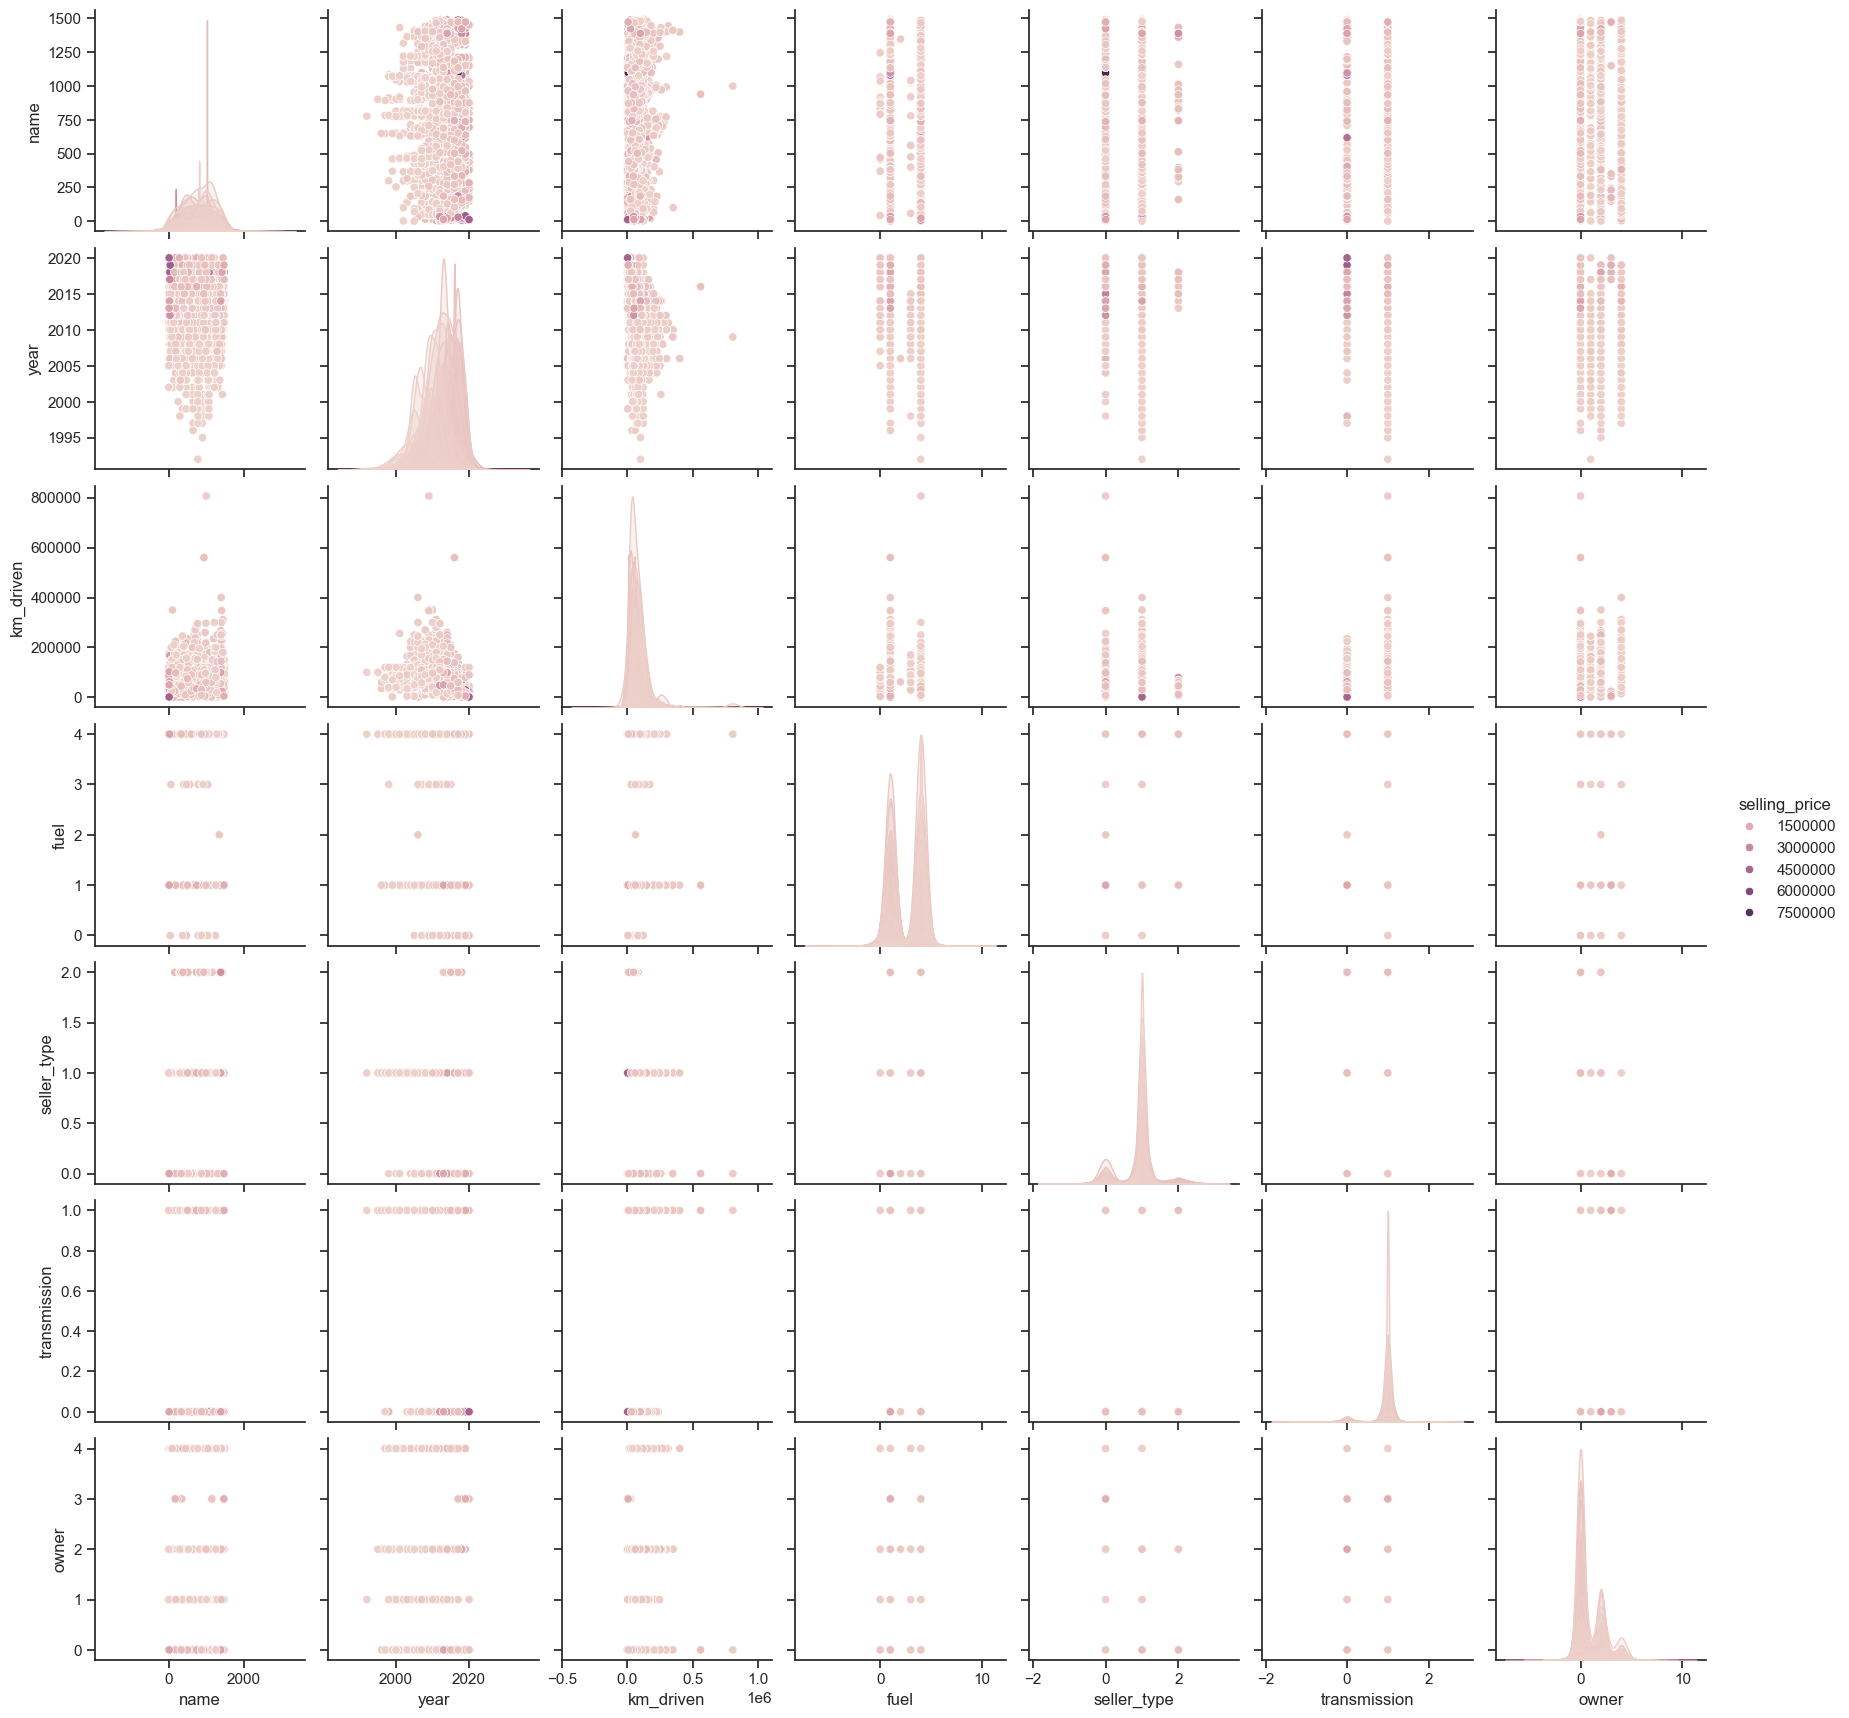

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(data,hue="selling_price")
plt.savefig("pair.png")

### Feature Target separation

In [14]:
x=data.drop(["selling_price"],axis=1)

In [15]:
y=data["selling_price"]

In [16]:
x

,name,year,km_driven,fuel,seller_type,transmission,owner
0,775,2007,70000,4,1,1,0
1,1041,2007,50000,4,1,1,0
2,505,2012,100000,1,1,1,0
3,118,2017,46000,4,1,1,0
4,279,2014,141000,1,1,1,2
...,...,...,...,...,...,...,...
5995,744,2016,35000,1,1,1,0
5996,935,2015,45974,1,2,1,0
5997,876,2017,30600,4,1,0,0
5998,994,2017,60000,1,1,1,2


In [17]:
y

0         60000
1        135000
2        600000
3        250000
4        450000
         ...   
5995    1250000
5996     750000
5997     800000
5998     600000
5999     425000
Name: selling_price, Length: 6000, dtype: int64

### Tran_Test_Split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

### Model Training

### LINEAR REGRESSION

In [22]:
linear_model=LinearRegression()

In [23]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [24]:
linear_model.score(x_train,y_train)

0.453827810105761

In [25]:
linear_model.score(x_test,y_test)

0.44814308786415136

### DECISION TREE

In [27]:
dtree_model=DecisionTreeRegressor()

In [28]:
dtree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
dtree_model.score(x_train,y_train)

0.9999246951382869

In [30]:
dtree_model.score(x_test,y_test)

0.8712458373896907

### RANDOM FOREST

In [32]:
forest_model=RandomForestRegressor()

In [33]:
forest_model.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
forest_model.score(x_train,y_train)

0.9811109324173992

In [35]:
forest_model.score(x_test,y_test)

0.8804041711762358

### K NEAREST NEIGHBOUR (KNN)

In [37]:
knn_model=KNeighborsRegressor()

In [38]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [39]:
knn_model.score(x_train,y_train)

0.6941311879448308

In [40]:
knn_model.score(x_test,y_test)

0.49573290766913447

### SUPPORT VECTOR MECHANISM (SVM)

In [42]:
# from sklearn.svm import SVR

In [43]:
# svm=SVR(kernel="linear")
# svm.fit(x_train,y_train)
# svm.score(x_test,y_test)

In [44]:
# svm.score(x_train,y_train)

In [45]:
# svm1=SVR(kernel="poly",degree=3,C=5,gamma="auto")
# svm1.fit(x_train,y_train)
# svm1.score(x_test,y_test)

In [46]:
# svm1.score(x_train,y_train)

In [47]:
# svm2=SVR(kernel="sigmoid")
# svm2.fit(x_train,y_train)
# svm2.score(x_test,y_test)

In [48]:
# svm2.score(x_train,y_train)

In [49]:
# svm3=SVR(kernel="rbf")
# svm3.fit(x_train,y_train)
# svm3.score(x_test,y_test)

In [50]:
# svm3.score(x_train,y_train)

In [51]:
# svm4=SVR()
# svm4.fit(x_train,y_train)
# svm4.fit(x_test,y_test)

### ENSEMBLE MODEL

#### ADA BOOST

In [54]:
adaboost=AdaBoostRegressor(n_estimators=400,learning_rate=0.3,random_state=1)

In [55]:
adaboost.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.3, n_estimators=400, random_state=1)

In [56]:
adaboost.score(x_train,y_train)

0.41372823064664177

In [57]:
adaboost.score(x_test,y_test)

0.3946349212918224

#### GRADIENT BOOST

In [59]:
grad_model=GradientBoostingRegressor(n_estimators=100,learning_rate=0.01,random_state=25)

In [60]:
grad_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, random_state=25)

In [61]:
grad_model.score(x_train,y_train)

0.5662048618125493

In [62]:
grad_model.score(x_test,y_test)

0.5033615994642658

#### XGB REGRESSOR

In [64]:
xg_model=XGBRegressor()

In [65]:
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
xg_model.score(x_train,y_train)

0.9924240490168875

In [67]:
xg_model.score(x_test,y_test)

0.9249774578236206

In [68]:
from sklearn.model_selection import KFold
x= data.drop('selling_price', axis=1) 
y= data['selling_price']

In [69]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return model.score(x_test,y_test)

In [70]:
fold = KFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_score.append(get_score(LinearRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeRegressor(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestRegressor(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsRegressor(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostRegressor(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBRegressor(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingRegressor(), x_train, x_test, y_train, y_test))

# You can now analyze the scores stored in the lists
print("Linear Regression scores:",log_score)
print("Decision Tree scores:",dt_score)
print("Random Forest scores:",rf_score)
print("KNN scores:",knn_score)
print("AdaBoost scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting scores:",gr_score)

Linear Regression scores: [0.47021776929805426, 0.4981126379818531, 0.43118193880165967, 0.3408797168452581, 0.47900439300532305, 0.4394485596405382]
Decision Tree scores: [0.7194117448078088, 0.7794619760335355, 0.7923471125482876, 0.5664884691781591, 0.7174015227223962, 0.8889870217817694]
Random Forest scores: [0.9084257584618125, 0.8787550143518169, 0.9446268592664224, 0.675844753985038, 0.9011477982504144, 0.9775853179509266]
KNN scores: [0.6286392774223175, 0.28534368677842203, 0.5809195212115879, 0.27255536427382865, 0.49215581027446853, 0.6514143844787585]
AdaBoost scores: [0.48396476902350527, 0.5061496230031954, 0.43137033767636135, 0.18575396981340608, 0.4811236885089304, 0.6504337425562964]
XGBoost scores: [0.9254567259391873, 0.8948367952603669, 0.9501779659592855, 0.7427571581668178, 0.9280097913443796, 0.9905331075264823]
Gradient Boosting scores: [0.8427164704958137, 0.8476185479930721, 0.8403212490576855, 0.631632122026719, 0.7888192707583184, 0.8549667943922481]


In [71]:
model_scores = {
"Linear Regression scores": [0.47021776929805426, 0.4981126379818531, 0.43118193880165967, 0.3408797168452581, 0.47900439300532305, 0.4394485596405382],
"Decision Tree scores": [0.7253670858338676, 0.7796798388899016, 0.7910986140681868, 0.5502814283479183, 0.7174015227223962, 0.8889870217817694],
"Random Forest scores": [0.9084257584618125, 0.8787550143518169, 0.9446268592664224, 0.675844753985038, 0.9011477982504144, 0.9775853179509266],
"KNN scores": [0.6286392774223175, 0.28534368677842203, 0.5809195212115879, 0.27255536427382865, 0.49215581027446853, 0.6514143844787585],
"AdaBoost scores": [0.6935165094845828, 0.3135575440937973, 0.425642555740273, 0.36851055049104975, 0.5220092783320789, 0.6381887301058118],
"XGBoost scores": [0.9254567259391873, 0.8948367952603669, 0.9501779659592855, 0.7427571581668178, 0.9280097913443796, 0.9905331075264823],
"Gradient Boosting scores": [0.8427196876173024, 0.8476185479930721, 0.842314287928325, 0.6341544147865118, 0.7888192707583184, 0.854966794392248]
}
scr= pd.DataFrame(model_scores)

In [72]:
scr

,Linear Regression scores,Decision Tree scores,Random Forest scores,KNN scores,AdaBoost scores,XGBoost scores,Gradient Boosting scores
0,0.470218,0.725367,0.908426,0.628639,0.693517,0.925457,0.842720
1,0.498113,0.779680,0.878755,0.285344,0.313558,0.894837,0.847619
2,0.431182,0.791099,0.944627,0.580920,0.425643,0.950178,0.842314
3,0.340880,0.550281,0.675845,0.272555,0.368511,0.742757,0.634154
4,0.479004,0.717402,0.901148,0.492156,0.522009,0.928010,0.788819
5,0.439449,0.888987,0.977585,0.651414,0.638189,0.990533,0.854967


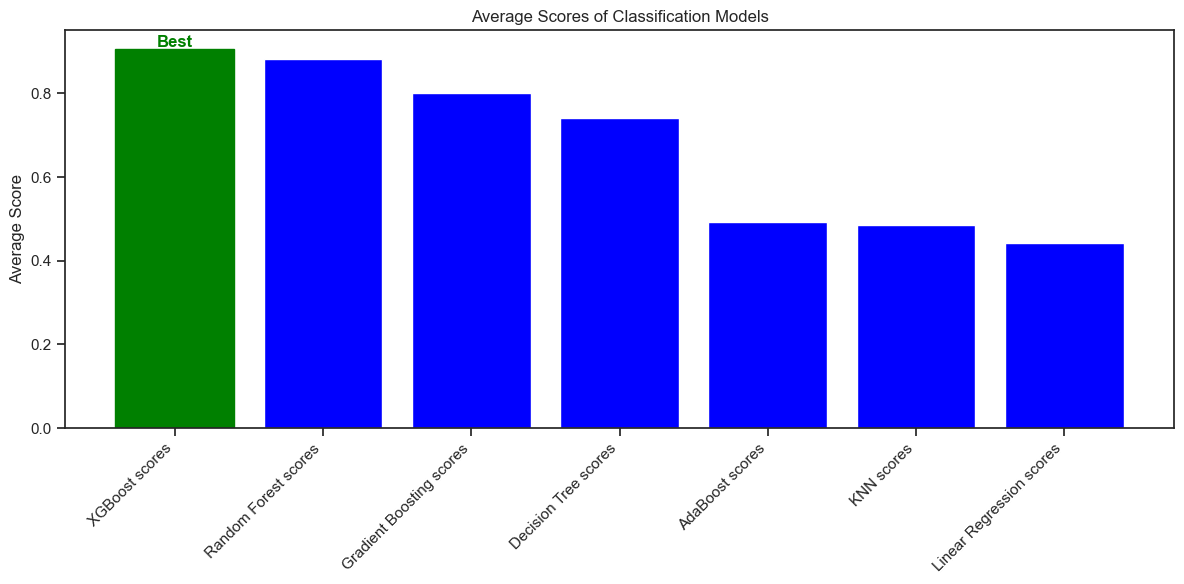

In [257]:
model_scores = {
    "Linear Regression scores": [0.47021776929805426, 0.4981126379818531, 0.43118193880165967, 0.3408797168452581, 0.47900439300532305, 0.4394485596405382],
"Decision Tree scores": [0.7253670858338676, 0.7796798388899016, 0.7910986140681868, 0.5502814283479183, 0.7174015227223962, 0.8889870217817694],
"Random Forest scores": [0.9084257584618125, 0.8787550143518169, 0.9446268592664224, 0.675844753985038, 0.9011477982504144, 0.9775853179509266],
"KNN scores": [0.6286392774223175, 0.28534368677842203, 0.5809195212115879, 0.27255536427382865, 0.49215581027446853, 0.6514143844787585],
"AdaBoost scores": [0.6935165094845828, 0.3135575440937973, 0.425642555740273, 0.36851055049104975, 0.5220092783320789, 0.6381887301058118],
"XGBoost scores": [0.9254567259391873, 0.8948367952603669, 0.9501779659592855, 0.7427571581668178, 0.9280097913443796, 0.9905331075264823],
"Gradient Boosting scores": [0.8427196876173024, 0.8476185479930721, 0.842314287928325, 0.6341544147865118, 0.7888192707583184, 0.854966794392248]
}

avg_scores = {model: np.mean(scores) for model, scores in model_scores.items()}

# Sort models by average score
sorted_models = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)
models, scores = zip(*sorted_models)

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(models, scores, color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Score")
plt.title("Average Scores of Classification Models")

# Highlight the best model
best_index = scores.index(max(scores))
bars[best_index].set_color('green')
plt.text(best_index, scores[best_index] + 0.005, 'Best', ha='center', color='green', fontweight='bold')

plt.tight_layout()
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
from xgboost import XGBRegressor

In [265]:
model_params={'model':XGBRegressor(),'params':{'n_estimators':[100,200,300],'max_depth': [None,3,5,7] }}

In [267]:
gds= GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=True)

In [ ]:
gds.fit(x_train,y_train)

In [ ]:
gds.best_score_

In [ ]:
gds.best_params_

In [ ]:
gds.fit(x_train,y_train)
y_predict=gds.predict(x_test)

In [ ]:
df=pd.DataFrame({'actual':y_test,'predicted':y_predict.round().astype(int)})
df

In [263]:
import joblib
joblib.dump(gds,r"C:\Users\sreerag kk\DS\Machine learning\PROJECT\used.pkl")

['C:\\Users\\sreerag kk\\DS\\Machine learning\\PROJECT\\used.pkl']

In [203]:
joblib.dump(le1,r"C:\Users\sreerag kk\DS\Machine learning\PROJECT\le1.pkl")
joblib.dump(le2,r"C:\Users\sreerag kk\DS\Machine learning\PROJECT\le2.pkl")
joblib.dump(le3,r"C:\Users\sreerag kk\DS\Machine learning\PROJECT\le3.pkl")
joblib.dump(le4,r"C:\Users\sreerag kk\DS\Machine learning\PROJECT\le4.pkl")
joblib.dump(le5,r"C:\Users\sreerag kk\DS\Machine learning\PROJECT\le5.pkl")


['C:\\Users\\sreerag kk\\DS\\Machine learning\\PROJECT\\le5.pkl']